In [2]:
%matplotlib inline
import utils
reload(utils)

<module 'utils' from 'utils.pyc'>

Loading data from us sample

In [3]:

%time X_us_train, X_us_test, y_us_train, y_us_test = utils.LoadDataset('data_0904/US', 0.33)


CPU times: user 33.1 s, sys: 2.85 s, total: 35.9 s
Wall time: 36 s


Train random forest models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rndf_us = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=0, n_jobs=4,verbose=1)
%time rndf_us = rndf_us.fit(X_us_train, y_us_train)


Evaluate classifiers

In [21]:

print  utils.classifierMetrics(rndf_us, X_us_test, y_us_test)


 mean_precision:0.96305020415 roc_auc_score :0.604439037812


In [8]:
feature_names=["same_country","same_locale","gender_mm","gender_mf","gender_mu","gender_fm","gender_ff","gender_fu",
               "gender_um","gender_uf","gender_uu","gender_m","gender_f","gender_u","picture_daily","update_profile_daily",
               "wink_daily","picture_30days","num_face","age","beauty","bright","sharp","white","indian","asian","distance",
               "fav_ratio"]
ftrs = [(n, s1) for (n, s1) in zip(feature_names, rndf_us.feature_importances_)]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US"))

Feature,US
distance,0.237523345088
wink_daily,0.219254804918
picture_daily,0.0837391134252
age,0.0634195185624
beauty,0.0633943488872
fav_ratio,0.0604501492739
update_profile_daily,0.0557133787186
bright,0.0506503116074
sharp,0.0410127822107
white,0.0260862908244


Precision Recall curves

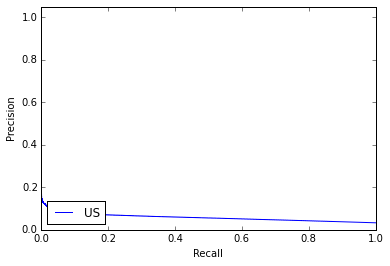

In [12]:
from sklearn.metrics import precision_recall_curve
y_us_score = rndf_us.predict_proba(X_us_test)
precision_us, recall_us, _ = precision_recall_curve(y_us_test, y_us_score[:,1])
utils.drawPRCurves(((recall_us, precision_us, "US"),))

Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
lr_us = LogisticRegression(penalty='l2')
%time lr_us= lr_us.fit(X_us_train, y_us_train)
print "US", utils.classifierMetrics(lr_us, X_us_test, y_us_test)


CPU times: user 2min 4s, sys: 2.54 s, total: 2min 7s
Wall time: 2min 29s
US  mean_precision:0.967063584286 roc_auc_score :0.638899761219


In [15]:
lr_us.coef_[0,:]
ftrs = [(n, s1) for (n, s1) in zip(feature_names, lr_us.coef_[0,:])]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US"))

Feature,US
distance,2.51289844669
beauty,0.444691438051
gender_u,0.325425125047
same_locale,0.203351325683
picture_30days,0.188948259824
gender_m,0.148619384983
gender_fm,0.0450482161727
gender_fu,0.0112210733175
wink_daily,0.0068910263072
update_profile_daily,0.00126280330353


GB Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_us = GradientBoostingClassifier(verbose=1)
%time gb_us= gb_us.fit(X_us_train, y_us_train)


      Iter       Train Loss   Remaining Time 
         1           0.2866           70.06m
         2           0.2851           54.94m
         3           0.2839           49.61m
         4           0.2829           46.66m
         5           0.2821           44.84m
         6           0.2813           43.47m
         7           0.2807           42.30m
         8           0.2802           41.27m
         9           0.2797           40.34m
        10           0.2793           39.59m
        20           0.2773           33.63m
        30           0.2764           28.76m
        40           0.2759           24.32m
        50           0.2755           20.16m
        60           0.2753           16.00m
        70           0.2751           11.89m

In [17]:
print "US", utils.classifierMetrics(gb_us, X_us_test, y_us_test)


US  mean_precision:0.967064245142 roc_auc_score :0.682510582515


In [18]:
ftrs = [(n, s1) for (n, s1) in zip(feature_names, gb_us.feature_importances_)]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US"))

Feature,US
distance,0.237929408987
wink_daily,0.178746669608
beauty,0.0781002339085
age,0.0762006891156
gender_mm,0.0580509486559
gender_uu,0.0440049834934
same_locale,0.0414463461901
fav_ratio,0.0398101827656
gender_um,0.0359933613836
picture_daily,0.0350539905744


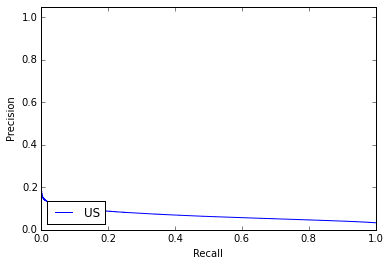

In [19]:
y_us_score = gb_us.predict_proba(X_us_test)
precision_us, recall_us, _ = precision_recall_curve(y_us_test, y_us_score[:,1])
utils.drawPRCurves(((recall_us, precision_us, "US"),))